# Breast Cancer Prediction using decision trees 

### Import necessary libraries

In [1]:
import pandas as pd
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree


RANDOM_STATE = 42 ## We will pass it to every sklearn call so we ensure reproducibility
pd.set_option('display.max_columns', None) #so we can have a full view of the columns

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


### Import the dataset directly from the Wisconsin's Breast Cancer detection [website](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)
We will also get a view of what the variables involved are. 

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


                  name     role         type demographic description units  \
0                   ID       ID  Categorical        None        None  None   
1            Diagnosis   Target  Categorical        None        None  None   
2              radius1  Feature   Continuous        None        None  None   
3             texture1  Feature   Continuous        None        None  None   
4           perimeter1  Feature   Continuous        None        None  None   
5                area1  Feature   Continuous        None        None  None   
6          smoothness1  Feature   Continuous        None        None  None   
7         compactness1  Feature   Continuous        None        None  None   
8           concavity1  Feature   Continuous        None        None  None   
9      concave_points1  Feature   Continuous        None        None  None   
10           symmetry1  Feature   Continuous        None        None  None   
11  fractal_dimension1  Feature   Continuous        None        

The features used for training look like this: 

In [3]:
X.head()

#features=[x for x in X.columns]

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


And the targets are, of course, if the tumor is benign (B) or malign (M), which will be encoded accordingly as 0 or 1. 

In [4]:
y.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [5]:
y['Diagnosis'] = y['Diagnosis'].map({'M': 1, 'B': 0})
y.head()

,Diagnosis
0,1
1,1
2,1
3,1
4,1


### Training the model

First, we prepare the datasets.

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = RANDOM_STATE)


Now, we will create a list with the minimum elements that we want each node to have, and another list with the maximu depth of the trees that we will create, and see what are the most optimal values. 

In [7]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 400, 450] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

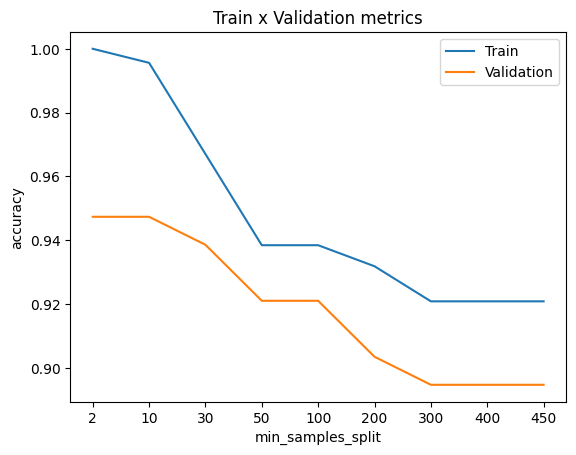

In [8]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

As we can see in the validation plot, the best value for the minimum samples in each node before splitting is 10 and 2, but we will choose 10 to avoid overfitting. 

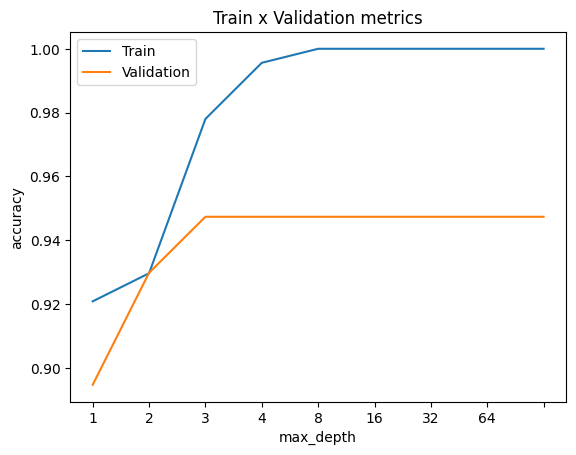

In [9]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

As for the max depth in the validation data, the best value is 3 and up. To avoid overfitting, we will use 3. 

In [10]:
#We define this variables which will be used to construct the decision tree
max_depth_optimal=3
min_samples_split_opt=10

Building the tree:

In [11]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = min_samples_split_opt,
                                             max_depth = max_depth_optimal,
                                             random_state = RANDOM_STATE).fit(X_train,y_train)

In [12]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9780
Metrics validation:
	Accuracy score: 0.9474


Plot the tree, as it's simple enough for an easy visualization:

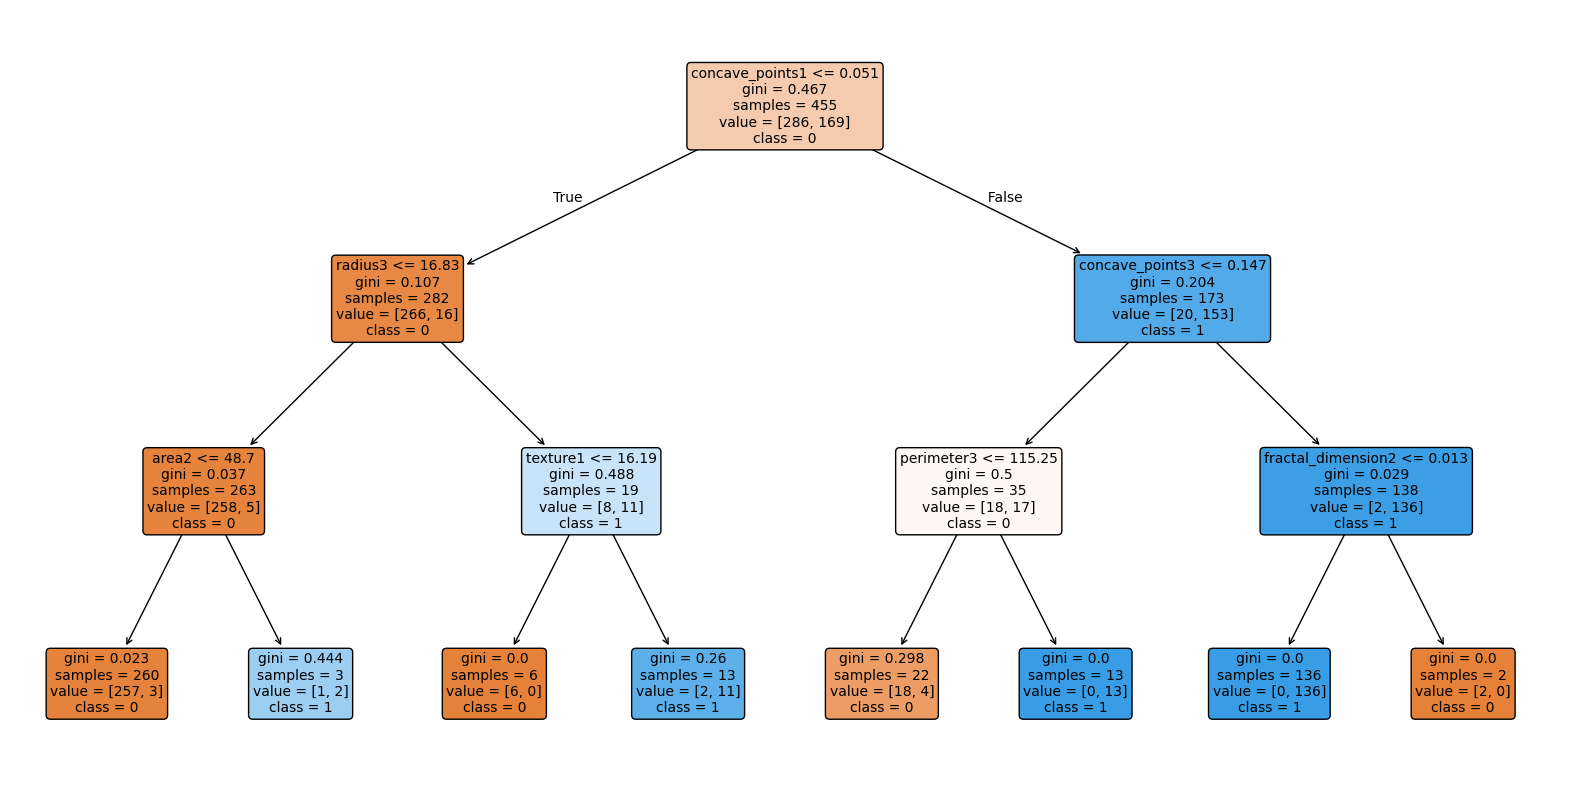

In [13]:
plt.figure(figsize=(20, 10))  # Adjust the size of the plot as needed

# Adjust font size using matplotlib.rc
plt.rc('font', size=12)  # You can change 'size' to the desired font size

plot_tree(
    decision_tree_model,
    filled=True,
    feature_names=X_train.columns,
    class_names=['0', '1'],
    rounded=True,
    fontsize=10  # Adjust the font size for the plot_tree function
)
plt.show()

Here we can see the process and the criterion that the decision tree is using to determine whether a tumor is benign or malign.


Now, we will try with random forests and see if we can get an even better precision and accuracy.

Now let's build random forests: 

In [14]:
min_samples_split_list = [2,10, 30, 50, 75, 100, 125, 150, 175, 200, 250, 300, 400, 450]  # If the number is an integer, then it is the actual quantity of samples,
                                             # If it is a float, then it is the percentage of the dataset
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,20, 30, 40, 50,100,500] #The number of estimators is the number of trees that we create, that will cast their votes in order to see what the best tree's overall composition is. 

Now, we will do a process like before and find the most optimal values for the different parameters.

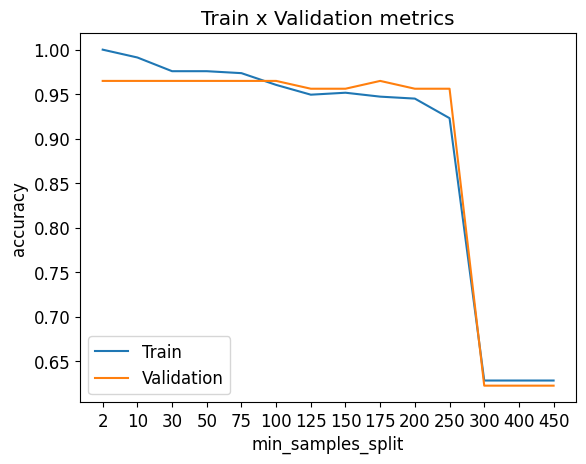

In [15]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

We can see that the optimal value is either 100 175 for the minimum samples per split, but we will choose 175 as to avoid overfitting, even though 100 would also be okay. 

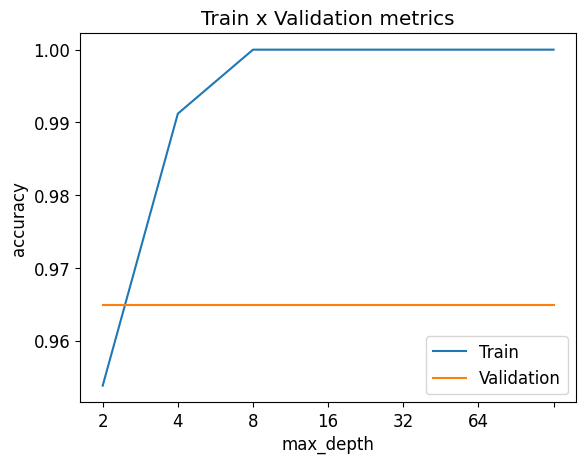

In [16]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

Regarding the depth, the best depth is 2, and up. To avoid overfitting, we will use, therefore, 2. 

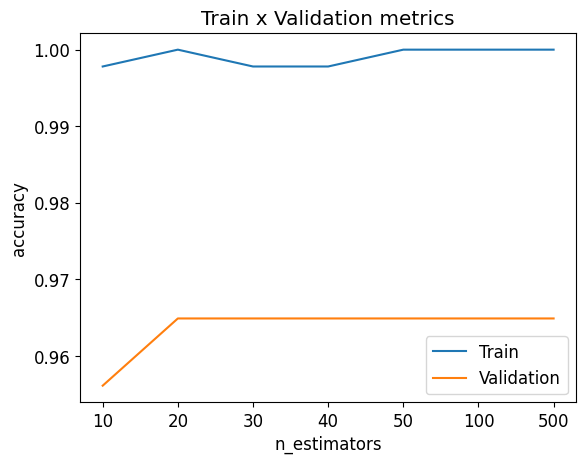

In [17]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

Regarding the number of estimators, we can see that the value is 20 and up, so we will choose 20 as for optimize our model as much as possible. 

In [18]:
max_depth_opt=2
min_samples_split_opt=175
n_estimators_opt=20

Now, we build the random forests, which will give us the best possible one out of the possibilities. 

In [19]:
random_forest_model = RandomForestClassifier(n_estimators = n_estimators_opt,
                                             max_depth = max_depth_opt, 
                                             min_samples_split = min_samples_split_opt).fit(X_train,y_train)

In [20]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9604
Metrics test:
	Accuracy score: 0.9561


We can see that after training this random forest classifier, we have indeed increased the accuracy. 

Finally, we will try to create a model with XGBoost, which is an efficient model for creating decision trees, which optimizes performance and precision.

Here, we set the number of estimators to an elevated value, and at the same time we set a value for early_stopping_rounds of 20, which means that if the model doesn't increase the performance over the next 20 iterations, the model will stop and give the best result until then. So, in a way, we introduce the stopping point or threshold for the model. 

In [21]:
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.15,verbosity = 1, random_state = RANDOM_STATE, early_stopping_rounds = 20)
xgb_model.fit(X_train,y_train, eval_set = [(X_val,y_val)])

[0]	validation_0-logloss:0.55564
[1]	validation_0-logloss:0.47436
[2]	validation_0-logloss:0.40904
[3]	validation_0-logloss:0.35881
[4]	validation_0-logloss:0.32275
[5]	validation_0-logloss:0.29009
[6]	validation_0-logloss:0.25954
[7]	validation_0-logloss:0.23436
[8]	validation_0-logloss:0.21727
[9]	validation_0-logloss:0.19951
[10]	validation_0-logloss:0.18697
[11]	validation_0-logloss:0.17830
[12]	validation_0-logloss:0.16668
[13]	validation_0-logloss:0.15904
[14]	validation_0-logloss:0.14670
[15]	validation_0-logloss:0.14358
[16]	validation_0-logloss:0.13614
[17]	validation_0-logloss:0.13283
[18]	validation_0-logloss:0.12475
[19]	validation_0-logloss:0.12342
[20]	validation_0-logloss:0.11965
[21]	validation_0-logloss:0.11679
[22]	validation_0-logloss:0.11566
[23]	validation_0-logloss:0.11613
[24]	validation_0-logloss:0.11536
[25]	validation_0-logloss:0.11266
[26]	validation_0-logloss:0.11392
[27]	validation_0-logloss:0.11155
[28]	validation_0-logloss:0.11119
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

We can see that the best iteration for the model was: 

In [22]:
xgb_model.best_iteration

334

In [23]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 1.0000
Metrics test:
	Accuracy score: 0.9649


As we can see, this model actually gave us a slightly better performance in the training accuracy than the two previous models but it remained equal regarding the accuracy for the test set. Nontheless, it is great to show the potential that this model has regarding both the efficiency and precision, specially for larger datasets and models. 

Finally, we can plot the model to see where the splittings were created and under which criterion: 

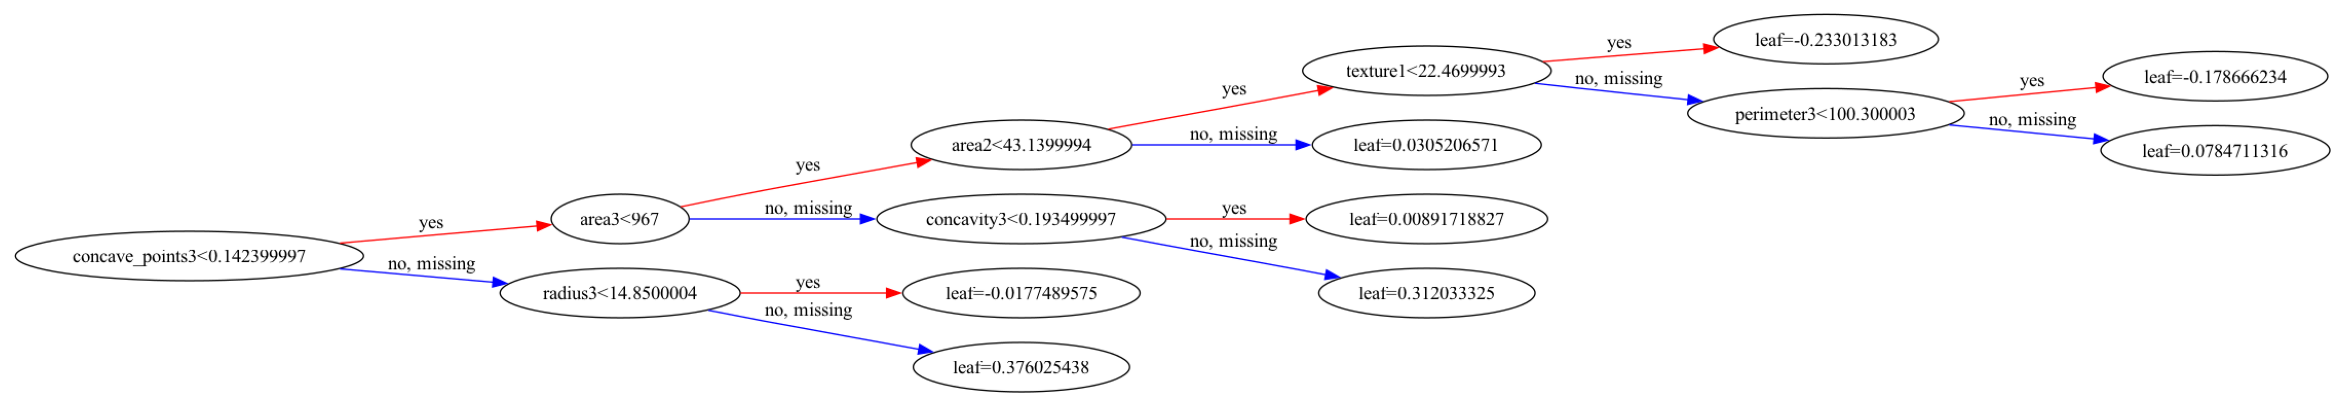

In [24]:
from xgboost import plot_tree

plt.rcParams['figure.figsize'] = (30, 20)  # Increase figsize for larger plot

# Plot the first tree in the model (index 0)
plot_tree(xgb_model, num_trees=0, rankdir='LR')  # num_trees specifies which tree to plot, rankdir='LR' for horizontal display
plt.show()

So, as a conclusion, we have been able to create decision trees for breast cancer detection, and build three different models to showcase their strengths and weaknesses, and get a really good performance on the dataset given. This shows the potential that Machine Learning algorithms can have in the exciting fields like medicine. 